In [1]:
import huracanpy
import matplotlib.pyplot as plt

In [2]:
# Load the data. Here: IBTrACS
data = huracanpy.load(source="ibtracs")

/Users/bourdin/Softs/huracanpy/huracanpy/_data/ibtracs.py:112: UserWarning: This offline function loads a light version of IBTrACS which is embedded within the package, based on a file produced manually by the developers.
                  It was last updated on the 15th Nov 2024, based on the IBTrACS file at that date.
                  It contains only data from 1980 up to the last year with no provisional tracks. All spur tracks were removed. Only 6-hourly time steps were kept.
  warnings.warn(
/Users/bourdin/Softs/huracanpy/huracanpy/_data/ibtracs.py:118: UserWarning: You are loading the IBTrACS-WMO subset.                       This dataset contains the positions and intensity reported by the WMO agency responsible for each basin
                      Be aware of the fact that wind and pressure data is provided as they are in IBTrACS,                       which means in particular that wind speeds are in knots and averaged over different time periods.
                    For more

In [3]:
# Get the basins
data["basin"] = huracanpy.info.basin(data.lon, data.lat)
# Equivalent to data = data.add_basin()

In [4]:
# Select the basin you're interested in (here: North Atlantic -- NATL)
## Option 1: Get only the points within this basin
NATL1 = data.where(data.basin == "NATL", drop=True)
## Option 2: Select tracks that have at least one point in this basin
### 2a : calling hurcanpy
NATL2a = huracanpy.trackswhere(data, data.track_id, lambda t: (t.basin == "NATL").any())
### 2b : Using the accessor
NATL2b = data.hrcn.trackswhere(lambda t: (t.basin == "NATL").any())

/Users/bourdin/Softs/miniforge3/envs/huracanpy/lib/python3.11/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension season because variable season is not a coordinate. To create an index for season, please first call `.set_coords('season')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


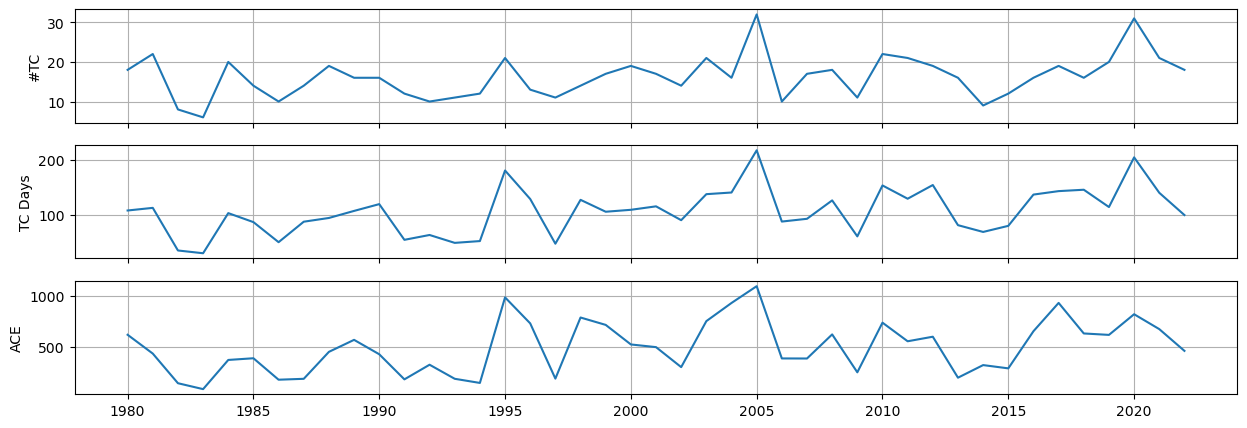

In [5]:
# Plot interannual variability
fig, axs = plt.subplots(3, figsize=[15, 5], sharex=True)

## Frequency
gen = huracanpy.calc.gen_vals(
    NATL1, NATL1.time, NATL1.track_id
)  # eq. to gen = data.hrcn.get_gen_vals()
freq = gen.groupby("season").count().time
freq.plot(ax=axs[0], label="frequency")

## TC days
tcd = NATL1.groupby("season").apply(
    lambda s: huracanpy.calc.track_duration(
        s.time, s.track_id
    ).sum()  # eq. to s.hrcn.get_track_duration().sum()
    / 24  # Conversion because track_duration is in h
)
tcd.plot(ax=axs[1], label="TC days")

## ACE
ace = NATL1.groupby("season").apply(
    lambda s: huracanpy.tc.ace(s.wind).sum()  # eq. to s.hrcn.get_ace().sum()
)
ace.plot(ax=axs[2], label="ACE")

# Labels
axs[0].set_ylabel("#TC")
axs[1].set_ylabel("TC Days")
axs[2].set_ylabel("ACE")
for ax in axs:
    ax.set_xlabel("")
    ax.set_xticks(range(1980, 2022, 5))
    ax.grid()